In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Ajuste de curvas

## Mínimos cuadrados

In [2]:
x=np.array([0,30,60,100,150,200])
Y=np.array([0.00e-3,0.10e-3,0.40e-3,1.20e-3,3.00e-3,6.50e-3]).reshape((len(x),1))
u=np.array([0.14e-3,0.17e-3,0.17e-3,0.17e-3,0.22e-3,0.23e-3]).reshape((len(x),1))

In [3]:
X=np.hstack((np.ones((len(x),1)),x.reshape((len(x),1)),x.reshape((len(x),1))**2))

In [4]:
x_test=np.arange(0,200+0.2,0.2)

In [5]:
cov=np.linalg.inv(np.matmul(X.T,X))
b=np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),Y)
y_pred=np.matmul(X,b)
e=Y-y_pred
var=e**2/(len(Y)-1)

Los coeficientes

In [6]:
b

array([[ 1.27941978e-04],
       [-1.03013426e-05],
       [ 2.07728223e-07]])

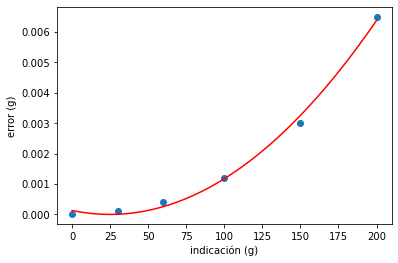

In [7]:
plt.scatter(X[:,1],Y)
plt.plot(x_test,x_test**2*b[2]+x_test*b[1]+b[0],color="red")
plt.xlabel("indicación (g)")
plt.ylabel("error (g)")
plt.show()

## Mínimos cuadrados ponderados

$$\beta=\left(X^TWX\right)^{-1}X^TWY$$

### Primera iteración

In [8]:
w=var+u**2
W=np.zeros((len(x),len(x)))
for i in range(len(W)):
    W[i,i]=1/w[i]

In [9]:
cov_WLS=np.linalg.inv(np.matmul(np.matmul(X.T,W),X))
b_WLS=np.matmul(np.matmul(np.matmul(cov_WLS,X.T),W),Y)
y_pred=np.matmul(X,b_WLS)
e=Y-y_pred
var=e**2/(len(Y)-1)

Los coeficientes

In [10]:
b_WLS

array([[ 7.80980690e-05],
       [-8.45766841e-06],
       [ 1.99303351e-07]])

### Segunda iteración

In [11]:
w=var+u**2
W=np.zeros((len(x),len(x)))
for i in range(len(W)):
    W[i,i]=1/w[i]

In [12]:
cov_WLS=np.linalg.inv(np.matmul(np.matmul(X.T,W),X))
b_WLS=np.matmul(np.matmul(np.matmul(cov_WLS,X.T),W),Y)
y_pred=np.matmul(X,b_WLS)
e=Y-y_pred
var=e**2/(len(Y)-1)

In [13]:
cov_WLS

array([[ 1.71853119e-08, -3.46635453e-10,  1.38038012e-12],
       [-3.46635453e-10,  1.35327791e-11, -6.64166630e-14],
       [ 1.38038012e-12, -6.64166630e-14,  3.63533709e-16]])

Los nuevos coeficientes

In [14]:
b_WLS

array([[ 7.12245209e-05],
       [-8.23424975e-06],
       [ 1.98391826e-07]])

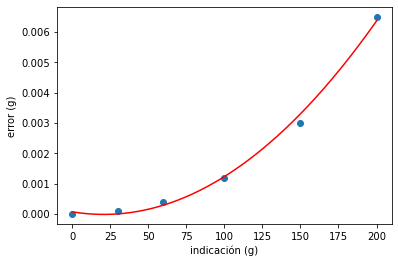

In [15]:
plt.scatter(X[:,1],Y)
plt.plot(x_test,x_test**2*b_WLS[2]+b_WLS[1]*x_test+b_WLS[0],color="red")
plt.xlabel("indicación (g)")
plt.ylabel("error (g)")
plt.show()

## La incertidumbre

$$y=rx^2+mx+b$$

La incertidumbre del ajuste en un punto que no es conocido en la curva está dada por:

$$u_y^2=\left(\frac{\partial y}{\partial x}\right)^2u_x^2+\left(\frac{\partial y}{\partial m}\right)^2u_m^2+\left(\frac{\partial y}{\partial b}\right)^2u_b^2+\left(\frac{\partial y}{\partial r}\right)^2u_r^2+\left(\frac{\partial y}{\partial b}\frac{\partial y}{\partial m}\right)\omega(b,m)+\left(\frac{\partial y}{\partial b}\frac{\partial y}{\partial r}\right)\omega(b,r)+\left(\frac{\partial y}{\partial m}\frac{\partial y}{\partial r}\right)\omega(m,r)$$

Donde $u_x^2$ es del proceso de medición (resolución), $x$ corresponde al punto de interés y $u_b^2$, $u_m^2$ y $u_m^2$ vienen de la matriz de covarianza.

$$u_y^{2}=\left(2rx+m\right)^{2}u_x^2+x^{2}u_m^2+u_b^2+x^4u_r^2+x\omega(b,m)+x^2\omega(b,r)+x^3\omega(m,r)$$

In [16]:
x_test=22.33342 # g

In [17]:
np.sqrt((2*b_WLS[2]*x_test+b_WLS[1])**2*(0.23e-3/2)**2+x_test**2*cov_WLS[1,1]+cov_WLS[0,0]+x_test**4*cov_WLS[2,2]+2*(x_test*cov_WLS[0,1]+x_test**2*cov_WLS[0,2]+x_test**3*cov_WLS[1,2]))

array([9.18687336e-05])

# Problema propuesto

La conductividad de las disoluciones salinas reciente fue modelada de la forma:

$$\kappa=\left(P_1T+P_2\right)m^{n}\exp{\left(-\frac{P_3 m}{T-P_4}\right)}$$

Donde $n$, $P_1$, $P_2$, $P_3$, y $P_4$, son constantes que dependen de la composición del solvente y deben determinadas experimentalmente. Las variables $T$ y $\kappa$ serían medidas al mismo tiempo, por lo que son correlacionadas y $m$ es la concentración de soluto en la disolución. Si se deseara determinar a partir de un conjunto de mediciones de $m$, $T$ y $\kappa$ una curva de ajuste que permitiera conocer valores de $\kappa$ no medidos y se obtuviera su incertidumbre, se tendría que, por medio del método de GUM:

$$u_\kappa^2=\left(\frac{\partial\kappa}{\partial P_1}\right)^2u_{P_{1}}^2+\left(\frac{\partial\kappa}{\partial P_2}\right)^2u_{P_{2}}^2+\left(\frac{\partial\kappa}{\partial P_3}\right)^2u_{P_{3}}^2+\left(\frac{\partial\kappa}{\partial P_{4}}\right)^2u_{P_{4}}^2+\left(\frac{\partial\kappa}{\partial n}\right)^2u_{n}^2+\left(\frac{\partial\kappa}{\partial m}\right)^2u_{m}^2+\left(\frac{\partial\kappa}{\partial T}\right)^2u_{T}^2$$

Entonces, los coeficientes de sensibilidad:

$$\frac{\partial\kappa}{\partial P_1}=\exp{\left(-\frac{mP_3}{T-P_4}\right)}Tm^n$$
$$\frac{\partial\kappa}{\partial P_2}=\exp{\left(-\frac{mP_3}{T-P_4}\right)}m^n$$
$$\frac{\partial\kappa}{\partial P_3}=-\frac{\exp{\left(-\frac{mP_3}{T-P_4}\right)}m^{1+n}\left(P_1T+P_2\right)}{T-P_4}$$
$$\frac{\partial\kappa}{\partial P_4}=-\frac{\exp{\left(-\frac{mP_3}{T-P_4}\right)}P_3m^{1+n}\left(P_1T+P_2\right)}{\left(T-P_4\right)^2}$$
$$\frac{\partial\kappa}{\partial n}=\left(P_1T+P_2\right)\exp{\left(-\frac{P_3m}{T-P_4}\right)}m^n\ln \left(m\right)$$
$$\frac{\partial\kappa}{\partial m}=\left(P_1T+P_2\right)\left(\exp{\left(-\frac{mP_3}{T-P_4}\right)}nm^{n-1}-\frac{\exp{\left(-\frac{mP_3}{T-P_4}\right)}P_3m^n}{T-P_4}\right)$$
$$\frac{\partial\kappa}{\partial T}=m^n\left(P_1\exp{\left(-\frac{P_3m}{T-P_4}\right)}+\frac{m\exp{\left(-\frac{P_3m}{T-P_4}\right)}P_3\left(P_1T+P_2\right)}{\left(T-P_4\right)^2}\right)$$

Nótese que la complijidad de los términos de primer orden es elevada, y muy probablemente los términos de orden superior así como las correlaciones deban ser tomadas en cuenta.

In [18]:
from scipy.optimize import curve_fit

In [19]:
def Conductividad(X,P1,P2,P3,P4,n):
    return (P1*X[1]+P2)*X[0]**n*np.exp(-P3*X[0]/(X[1]-P4))

In [20]:
temp=np.array([283.15,283.15,283.15,293.15,293.15,293.15,303.15,303.15,303.15,313.15,313.15,313.15,323.15,323.15,323.15,333.15,333.15,333.15])
m=np.array([0.5,2.0,3.5,0.5,2.0,3.5,0.5,2.0,3.5,0.5,2.0,3.5,0.5,2.0,3.5,0.5,2.0,3.5])
kappa=np.array([33.28,101.87,136.42,41.63,127.82,171.68,50.00,153.96,207.38,58.39,180.28,243.52,66.79,206.79,280.10,75.20,233.46,317.09])

In [21]:
X=np.hstack((m.reshape(len(m),1),temp.reshape(len(m),1))).T

In [22]:
coefs,cov=curve_fit(Conductividad,X,kappa,p0=np.array([1.818,-442.0,160.4,-616.1,1.0]))

In [23]:
coefs

array([   1.81789445, -441.96607985,  160.2132845 , -614.91991744,
          1.00004569])

In [24]:
np.diag(cov)

array([8.53075562e-09, 7.86215725e-04, 5.25614050e-02, 1.75237300e+00,
       1.09285655e-09])

Entonces, si se desea conocer el valor de la conductividad en un punto con $T=298.15\textrm{ K}$ y una concentración de $5.0\textrm{ mol/kg}$, asumiendo que $u_m=0.5\textrm{ mol/kg}$ y $u_T=0.5\textrm{ K}$, la incertidumbre da:

In [25]:
Conductividad((5.0,298.15),coefs[0],coefs[1],coefs[2],coefs[3],coefs[4])

208.04200824243281

In [26]:
np.sqrt((298.15*5.0**coefs[4]*np.exp(-coefs[2]*5.0/(298.15-coefs[3]))*cov[0,0])**2+(5.0**coefs[4]*np.exp(-coefs[2]*5.0/(298.15-coefs[3]))*cov[1,1])**2+((coefs[0]*298.15+coefs[1])*5.0**(coefs[4]+1)*np.exp(-coefs[2]*5.0/(298.15-coefs[3]))/(298.15-coefs[3])*cov[2,2])**2+((coefs[0]*298.15+coefs[1])*5.0**(coefs[4]+1)*coefs[2]*np.exp(-coefs[2]*5.0/(298.15-coefs[3]))/(298.15-coefs[3])**2*cov[3,3])**2+((coefs[0]*298.15+coefs[1])*5.0**(coefs[4])*np.exp(-coefs[2]*5.0/(298.15-coefs[3]))*np.log(5.0)*cov[4,4])**2+((coefs[0]*298.15+coefs[1])*(np.exp(-coefs[2]*5.0/(298.15-coefs[3]))*coefs[4]*5.0**(coefs[4]-1)-(coefs[2]*5.0**coefs[4]*np.exp(-coefs[2]*5.0/(298.15-coefs[3])))/(298.15-coefs[3]))*0.5/2)**2+(5.0**coefs[4]*(coefs[0]*np.exp(-coefs[2]*5.0/(298.15-coefs[3]))+(5.0*np.exp(-coefs[2]*5.0/(298.15-coefs[3]))*coefs[2]*(coefs[0]*298.15+coefs[1]))/(298.15-coefs[3])**2)*0.5/2)**2)

1.6570746723899672

## Utilizando Monte Carlo

Utilizando Monte Carlo se puede determinar la incertidumbre para la conductividad cuando $T=298.15\textrm{ K}$ y $m=5.0\textrm{ mol/kg}$

In [27]:
from numpy.random import normal
from numpy.random import uniform
from scipy import stats

In [28]:
N=10**6

In [29]:
temp=298.15+normal(0,0.5/2,size=N)
m=5.0+normal(0,0.5/2,size=N)

In [30]:
coefs=coefs.reshape(len(coefs),1)+normal(0,np.diag(cov).reshape((len(coefs),1)),size=(len(coefs),N))

In [31]:
kappaf=Conductividad((m,temp),coefs[0],coefs[1],coefs[2],coefs[3],coefs[4])

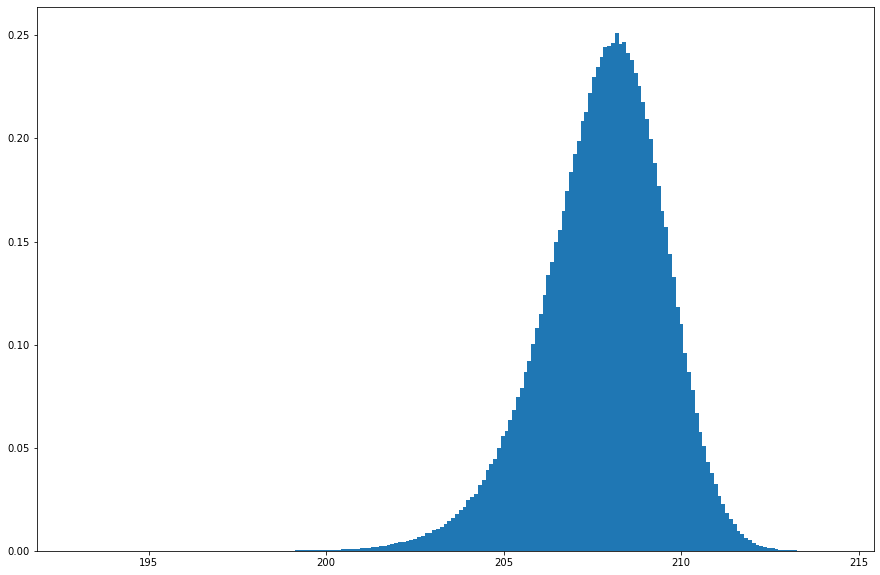

In [32]:
plt.figure(figsize=(15,10))
plt.hist(kappaf,bins=200,density=True)
plt.show()

In [33]:
kappaf.mean(),kappaf.std()

(207.78475722717934, 1.7109528340832116)

In [34]:
dist=getattr(stats,'norm')
dist.fit(kappaf)

(207.78475722717934, 1.7109528340832116)

In [35]:
stats.kstest(kappaf, "norm", dist.fit(kappaf))

KstestResult(statistic=0.0351700906047937, pvalue=0.0)

Error normalizado

In [36]:
(208.04-207.78)/np.sqrt((2*1.71)**2+(2*1.65)**2)

0.05470787430199938

Ambas estimaciones de incertidumbre son estadísticamente iguales; sin embargo, el trabajo para determinarla por medio de GUM fue mucho mayor.

# Densidad de la esfera

Este ejercicio no daría normal si existiese un dominio fuerte por parte de una distribución rectangular. Como se muestra en el ejemplo:

In [37]:
M=10**6

In [38]:
masa=np.array([543.12,543.10,543.16,543.13,543.12])
diámetro=np.array([120.02,120.09,120.12,119.94,120.01])

In [39]:
def Densidad(m,d):
    return 6*m/np.pi/d**3

In [40]:
m_res=uniform(-0.01/2,0.01/2,size=M)
m_rep=normal(0,masa.std()/np.sqrt(len(masa)),size=M)
m_cert=normal(-0.03,0.01/2,size=M)

In [41]:
d_res=uniform(-0.01/2,0.01/2,size=M)
d_rep=normal(0,diámetro.std()/np.sqrt(len(diámetro)),size=M)
d_emp=uniform(-0.04,0.04,size=M)

In [42]:
masa=masa.mean()+20*m_res+m_rep+m_cert
diámetro=diámetro.mean()+d_res+d_rep+20*d_emp

In [43]:
rho=Densidad(masa,diámetro)

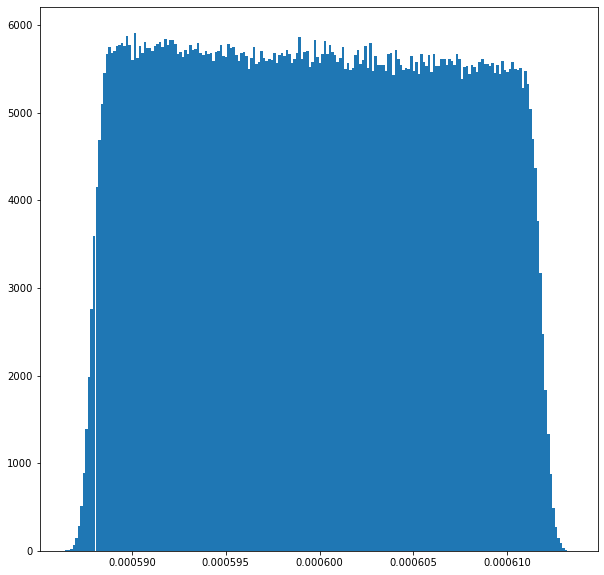

In [44]:
plt.figure(figsize=(10,10))
plt.hist(rho,bins=200,density=False)
plt.show()

# La canción

Una canción que me gustaría compartir es la siguiente https://open.spotify.com/track/6nl0gvWvWyDOPtNODn3Q4O?si=f45ad3b1be40406a. La razón es que esta canción me recuerda un sentir cuando estuve en Santiago de Chile, una ciudad fría no solamente por los inviernos, sino por la forma en que se mueve. Y ahí viví "esta enfermedad de amanecer nostálgico" y "Mi llorar es un asunto sintomático de mi propio nave que nada a toda máquina".